# A. Import data, EDA, Manipulation

## A.1 Import and merge

### A.1.1 Import libraries

In [1]:
library(tidyverse)
library(foreign)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
Warning message:
“package ‘tidyr’ was built under R version 3.6.2”Warning message:
“package ‘dplyr’ was built under R version 3.6.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### A.1.2.1 Set file path for main folder and DTA files folder

In [2]:
path = getwd()

## A.2 Calculating consumption

### A.2.1 Weekly variables

### A.2.1.1 Import weekly variables data "i_cs"

In [3]:
df1 = read.dta(paste(path,'/hh02dta_b1/i_cs.dta', sep=''))
df1 = as_tibble(df1)
df1 = df1 %>% rename(Household_id = folio)

### A.2.1.2 Select weekly consumption variables

In [4]:
cons1 = df1 %>%
  select(Household_id,
         intersect(contains('cs02a_'), ends_with('2')))

#### A.2.1.2.1 Convert weekly varibles to monthly vars

In [5]:
cons1 = cons1 %>% 
  mutate_at(vars(cs02a_12:cs02a_82),.funs = funs(. *4.3))

Warning message:
“funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session.”

### A.2.2 Monthly variables
- Uses "i_cs"

In [6]:
cons2 = df1 %>%
  select(Household_id,
         intersect(contains('cs16'), ends_with('2')))

### A.2.3 3-Month variables

#### A.2.3.1 Import weekly variables data "i_cs1"

In [7]:
df2 = read.dta(paste(path,'/hh02dta_b1/i_cs1.dta', sep=''))
df2 = as_tibble(df2)
df2 = df2 %>% rename(Household_id = folio) #Rename

#### A.2.1.3.1 Convert 3-month varibles to monthly vars

In [8]:
cons3 = df2 %>%
  select(Household_id,
         intersect(contains('cs22'), ends_with('2')))


In [9]:
cons3 = cons3 %>% 
  mutate_at(vars(cs22a_2:cs22h_2),.funs = funs(. /3))

### A.2.4 Merge consumption variables into one dataframe

In [10]:
merge1 = merge(cons1, cons2, by = 'Household_id', all= TRUE)
cons_merge = merge(merge1, cons3, by = 'Household_id', all= TRUE)
head(cons_merge,3)

,Household_id,cs02a_12,cs02a_22,cs02a_32,cs02a_42,cs02a_52,cs02a_62,cs02a_72,cs02a_82,cs16a_2,⋯,cs16h_2,cs16i_2,cs22a_2,cs22b_2,cs22c_2,cs22d_2,cs22e_2,cs22f_2,cs22g_2,cs22h_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,21.5,34.4,21.5,25.8,43.0,43,150.5,64.5,65,⋯,0,811,0.0000,200.00000,66.66667,0.00000,0,0,0.0000,0
2,2000,21.5,43.0,8.6,21.5,51.6,43,215.0,430.0,184,⋯,32,325,0.0000,166.66667,0.00000,0.00000,0,50,2666.6667,0
3,3000,21.5,30.1,43.0,73.1,301.0,43,430.0,215.0,112,⋯,30,822,333.3333,66.66667,100.00000,33.33333,0,100,133.3333,0


In [11]:
#write.csv(cons_merge, 'consu_R.csv')

# Homework Questions

## Q.1. 
- Calculate a measure of total consumption and per capita consumption for each household in the 2002 round. 
    - To calculate per capita note you will have to calculate the number of individuals in each household.

## Q.1.1 Total consumption

### 1.1.1 Calculate total consumer spending
- Sum the rows from cons_merge (A.2.4)

In [12]:
total_cons = cons_merge %>% mutate(consumption = select(cons_merge,-Household_id)%>% {rowSums(.)})
total_cons[["consumption"]][is.na(total_cons[["consumption"]])] <- 0

In [13]:
total_cons%>%head(3)

,Household_id,cs02a_12,cs02a_22,cs02a_32,cs02a_42,cs02a_52,cs02a_62,cs02a_72,cs02a_82,cs16a_2,⋯,cs16i_2,cs22a_2,cs22b_2,cs22c_2,cs22d_2,cs22e_2,cs22f_2,cs22g_2,cs22h_2,consumption
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,21.5,34.4,21.5,25.8,43.0,43,150.5,64.5,65,⋯,811,0.0000,200.00000,66.66667,0.00000,0,0,0.0000,0,1876.867
2,2000,21.5,43.0,8.6,21.5,51.6,43,215.0,430.0,184,⋯,325,0.0000,166.66667,0.00000,0.00000,0,50,2666.6667,0,5464.533
3,3000,21.5,30.1,43.0,73.1,301.0,43,430.0,215.0,112,⋯,822,333.3333,66.66667,100.00000,33.33333,0,100,133.3333,0,3522.367


#### 1.1.1.1 Basic stats: total consumer spending

In [14]:
summary(total_cons$consumption)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
      0.0     348.1     914.1    1778.4    1776.8 1450982.7 

#### 1.1.1.2 Graph: total consumer spending

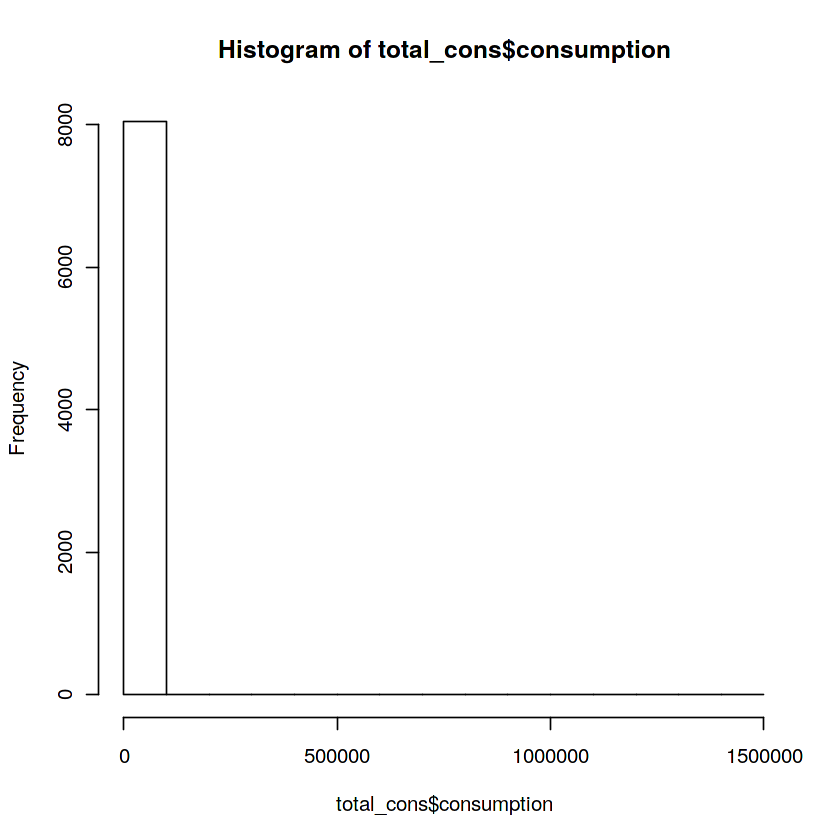

In [15]:
hist(total_cons$consumption)

## Q.1.2 Per capita consumption (Total/house size)

### 1.2.1 Avg. house size

#### 1.2.1.1 Import house size data set "c_ls"

In [16]:
df_housesize = read.dta(paste(path,'/hh02dta_bc/c_ls.dta', sep=''))
df_housesize = as_tibble(df_housesize) #Set as tibble
head(df_housesize,2)

folio,ls,secuencia,ls00,ls02_1,ls02_2,ls03_1,ls03_21,ls03_22,ls04,⋯,ls09,ls10,ls11,ls12,ls13_1,ls13_2,ls14,ls15_1,ls16,ls18
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,1,1,1,1,37,NA,NA,NA,1,⋯,1,5,2,1,1,32000,3,6,3,NA
1000,2,2,2,1,35,NA,NA,NA,3,⋯,1,5,1,3,NA,NA,1,NA,3,NA


#### 1.2.1.2 Count family members "ls" in each household "folio"

In [17]:
family_members = df_housesize %>% group_by(folio) %>% count(folio)  
family_members = family_members%>% rename(family_members = n, Household_id=folio)
head(family_members)

Household_id,family_members
<dbl>,<int>
1000,4
2000,5
3000,8
4000,5
6000,9
7000,4


#### 1.2.1.2 Family members graph

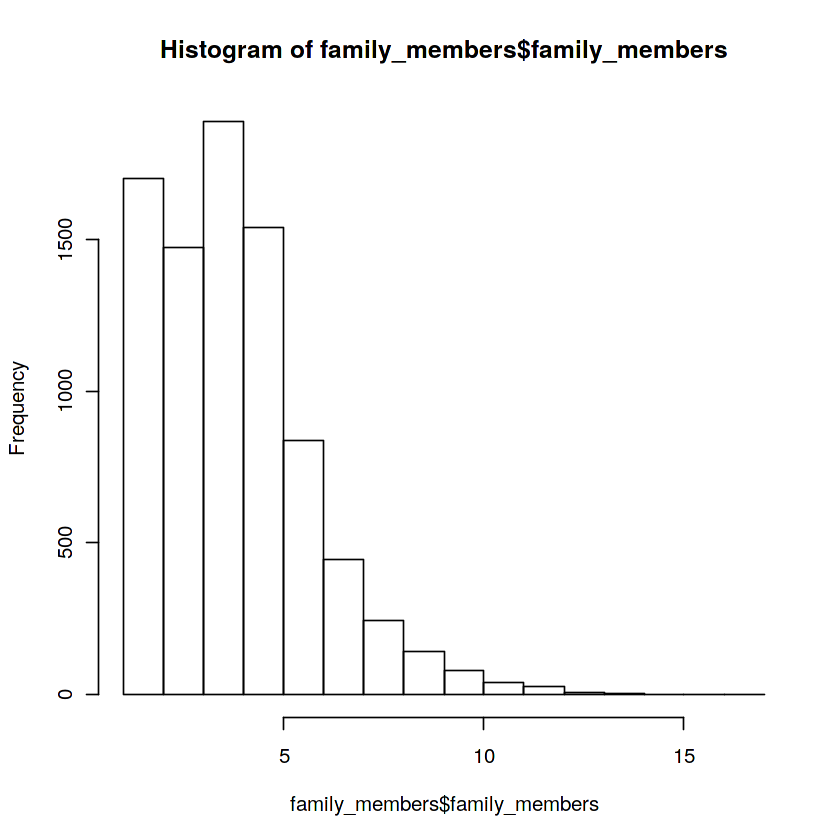

In [18]:
hist(family_members$family_members)

## 1.3 Per capita consumption (Total/house size)

### 1.3.1 Merge family_members and consumption data set

#### 1.3.1.1 Check to see if df are the same length

In [19]:
length(family_members$family_members) == length(total_cons$consumption)
length(merge(family_members, total_cons, by='Household_id', all=TRUE)$family_members)== length(merge(family_members, total_cons, by='Household_id')$family_members)

[1] FALSE

[1] FALSE

#### 1.3.1.2 Merge two data sets and drop na values

In [20]:
percap_consum = merge(family_members, total_cons, by='Household_id')
percap_consum%>% head(3)

,Household_id,family_members,cs02a_12,cs02a_22,cs02a_32,cs02a_42,cs02a_52,cs02a_62,cs02a_72,cs02a_82,⋯,cs16i_2,cs22a_2,cs22b_2,cs22c_2,cs22d_2,cs22e_2,cs22f_2,cs22g_2,cs22h_2,consumption
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,4,21.5,34.4,21.5,25.8,43.0,43,150.5,64.5,⋯,811,0.0000,200.00000,66.66667,0.00000,0,0,0.0000,0,1876.867
2,2000,5,21.5,43.0,8.6,21.5,51.6,43,215.0,430.0,⋯,325,0.0000,166.66667,0.00000,0.00000,0,50,2666.6667,0,5464.533
3,3000,8,21.5,30.1,43.0,73.1,301.0,43,430.0,215.0,⋯,822,333.3333,66.66667,100.00000,33.33333,0,100,133.3333,0,3522.367


#### 1.3.1.3 Calculate percapita consumption

In [21]:
percap_consum = percap_consum %>%
mutate(percap_consum = percap_consum$consumption/percap_consum$family_members)
percap_consum%>% head(3)

,Household_id,family_members,cs02a_12,cs02a_22,cs02a_32,cs02a_42,cs02a_52,cs02a_62,cs02a_72,cs02a_82,⋯,cs22a_2,cs22b_2,cs22c_2,cs22d_2,cs22e_2,cs22f_2,cs22g_2,cs22h_2,consumption,percap_consum
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,4,21.5,34.4,21.5,25.8,43.0,43,150.5,64.5,⋯,0.0000,200.00000,66.66667,0.00000,0,0,0.0000,0,1876.867,469.2167
2,2000,5,21.5,43.0,8.6,21.5,51.6,43,215.0,430.0,⋯,0.0000,166.66667,0.00000,0.00000,0,50,2666.6667,0,5464.533,1092.9067
3,3000,8,21.5,30.1,43.0,73.1,301.0,43,430.0,215.0,⋯,333.3333,66.66667,100.00000,33.33333,0,100,133.3333,0,3522.367,440.2958


In [22]:
# Export data to CSV
#write.csv(percap_consum, 'R_data.csv')

#### 1.3.1.4 Percap consumption summary

In [23]:
summary(percap_consum[,2:4])

 family_members     cs02a_12            cs02a_22      
 Min.   : 1.00   Min.   :     0.00   Min.   :   0.00  
 1st Qu.: 3.00   1st Qu.:    12.90   1st Qu.:   0.00  
 Median : 4.00   Median :    21.50   Median :  34.40  
 Mean   : 4.23   Mean   :    55.89   Mean   :  38.47  
 3rd Qu.: 5.00   3rd Qu.:    30.10   3rd Qu.:  47.30  
 Max.   :17.00   Max.   :215516.00   Max.   :4351.60  
                 NA's   :209         NA's   :200      

# Q.2. 

- Calculate the set of poverty rates nationwide using the FGT indicators of poverty:
    - Head count
    - Average poverty gap
    - Average poverty gap squared. 
- Assume the poverty line=500 pesos per person. Provide poverty rates based on household consumption per capita.



## 2.1 Headcount using 500 as an example

In [24]:
povertyline = 500

below_poverty = percap_consum %>%filter(percap_consum < povertyline )%>% select(percap_consum) 
observations = length(percap_consum$percap_consum)
head_count = length(below_poverty$percap_consum)/observations

In [25]:
print(paste('Headcount: ', round(head_count*100, 2),'%', sep=''), quote=FALSE)

[1] Headcount: 75.65%


## 2.2 Avg. poverty gap

In [26]:
mean(povertyline-below_poverty$percap_consum)

[1] 322.2531

## 2.3 Avg. poverty gap squared

In [27]:
mean((povertyline-below_poverty$percap_consum)**2)

[1] 124393.6

## Q.3 Repeat 2) by area of residence.

- How does the poverty rate change by rural/urban residence?

## 3.1. Import residence data from "c_portad"

In [28]:
residence_df = read.dta(paste(path,'/hh02dta_bc/c_portad.dta', sep=''))
residence_df = residence_df%>% rename(Household_id = folio)
head(residence_df)

,Household_id,ls,rel,reh,edo,mpio,loc,control,estrato,edad,id_loc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6299000,1,20,1,3,1,38,20,4,73,3138
2,6293000,2,20,1,3,1,38,20,4,49,3138
3,6281000,2,20,1,3,1,38,20,4,41,3138
4,6312000,1,20,1,3,1,38,20,4,32,3138
5,6314000,2,20,1,3,1,38,20,4,55,3138
6,6331000,2,20,1,3,1,38,20,4,31,3138


### 3.1.1. Merge residence df with percap_consum df from Q.1 & Q.2 

In [29]:
consum_residence_df  = merge(residence_df, percap_consum, by='Household_id')
consum_residence_df  = as_tibble(consum_residence_df)
consum_residence_df %>% head(3)

Household_id,ls,rel,reh,edo,mpio,loc,control,estrato,edad,⋯,cs22a_2,cs22b_2,cs22c_2,cs22d_2,cs22e_2,cs22f_2,cs22g_2,cs22h_2,consumption,percap_consum
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,2,20,1,20,107,61,207409,3,35,⋯,0.0000,200.00000,66.66667,0.00000,0,0,0.0000,0,1876.867,469.2167
2000,2,20,4,20,107,61,207409,3,42,⋯,0.0000,166.66667,0.00000,0.00000,0,50,2666.6667,0,5464.533,1092.9067
3000,2,20,1,20,107,61,207409,3,35,⋯,333.3333,66.66667,100.00000,33.33333,0,100,133.3333,0,3522.367,440.2958


#### 3.1.1.2 Create poverty dummy

In [30]:
consum_residence_df$poverty_dummy <- as.numeric(consum_residence_df$percap_consum<povertyline)
consum_residence_df %>% filter(poverty_dummy ==1) #Show observations living in poverty

Household_id,ls,rel,reh,edo,mpio,loc,control,estrato,edad,⋯,cs22b_2,cs22c_2,cs22d_2,cs22e_2,cs22f_2,cs22g_2,cs22h_2,consumption,percap_consum,poverty_dummy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,2,20,1,20,107,61,207409,3,35,⋯,200.00000,66.66667,0.00000,0.00000,0.00000,0.00000,0,1876.8667,469.21667,1
3000,2,20,1,20,107,61,207409,3,35,⋯,66.66667,100.00000,33.33333,0.00000,100.00000,133.33333,0,3522.3667,440.29583,1
4000,2,20,4,20,107,61,207409,3,30,⋯,490.33333,139.33333,139.33333,334.33333,0.00000,158.33333,0,0.0000,0.00000,1
6000,2,20,4,20,107,61,207409,3,62,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,1778.7000,197.63333,1
10000,1,20,1,20,107,61,207559,3,36,⋯,0.00000,33.33333,50.00000,0.00000,0.00000,0.00000,0,263.9333,52.78667,1
11000,2,20,1,20,107,61,207559,3,24,⋯,100.00000,166.66667,166.66667,0.00000,0.00000,0.00000,0,1603.8333,400.95833,1
14000,1,20,1,20,107,61,207559,3,67,⋯,0.00000,4.00000,0.00000,0.00000,0.00000,116.66667,0,783.1667,261.05556,1
16000,1,20,1,20,107,61,207559,3,42,⋯,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,1031.6333,257.90833,1
17000,3,20,1,20,107,61,207559,3,33,⋯,500.00000,0.00000,0.00000,0.00000,0.00000,333.33333,1000,0.0000,0.00000,1


## 3.2 Show poverty by area of residence

In [31]:
consum_residence_df %>% 
group_by(estrato) %>% #Groupby estrato
count(poverty_dummy) %>% #Count poverty dummy by each estrato
mutate(obs = sum(n))%>% 
mutate(head_count = (n/obs)*100)%>% 
filter(poverty_dummy==1) %>% 
select(estrato, head_count)

estrato,head_count
<dbl>,<dbl>
1,65.62996
2,64.56693
3,81.27962
4,86.33465


# Q.4. 

Calculate the Gini coefficient overall and by urban and rural areas both using consumption measures. In both R and Stata there are programs which can be downloaded to calculate the Gini. Provide a graph of the Lorenz curve.

## 4.1 Calculate cumulative sum for population and consumption

In [32]:
gini = percap_consum %>% 
arrange(percap_consum) %>% #Sort consumption from least to greatest
mutate(consum_cumulative = cumsum(percap_consum), consum_total = sum(percap_consum), pop_total = sum(family_members), pop_cumulative = cumsum(family_members))%>% #Calculate total and cumulative sum for variables 
mutate(consum_pct = (consum_cumulative/consum_total), pop_pct= ((pop_cumulative/ pop_total))) #Calculate quintiles
gini %>% head(3) #Show new data

,Household_id,family_members,cs02a_12,cs02a_22,cs02a_32,cs02a_42,cs02a_52,cs02a_62,cs02a_72,cs02a_82,⋯,cs22g_2,cs22h_2,consumption,percap_consum,consum_cumulative,consum_total,pop_total,pop_cumulative,consum_pct,pop_pct
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,4000,5,21.5,129,21.5,25.8,0.0,43,301,107.5,⋯,158.3333,0,0,0,0,3927553,34063,5,0,0.0001467868
2,17000,5,0.0,0,0.0,0.0,0.0,0,0,0.0,⋯,333.3333,1000,0,0,0,3927553,34063,10,0,0.0002935737
3,22000,1,17.2,43,8.6,17.2,51.6,43,0,34.4,⋯,666.6667,0,0,0,0,3927553,34063,11,0,0.0003229310


### 4.1.1 Plot lorenz curve:

In [33]:
library(ggplot2)

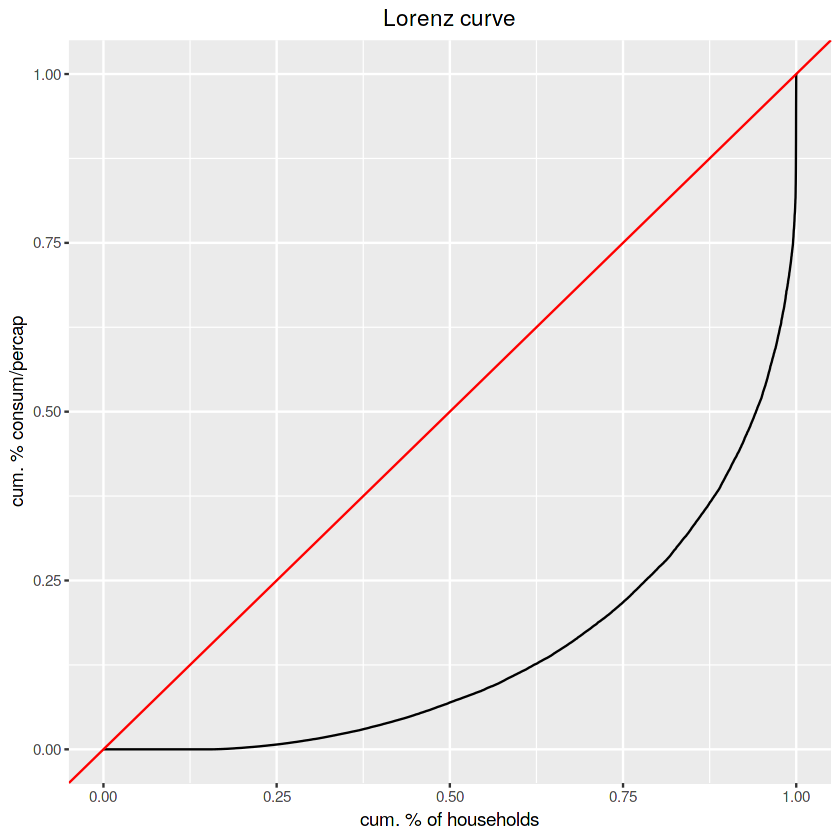

In [34]:
ggplot(data= gini, aes(x=pop_pct, y= consum_pct))+ 
ggtitle("Lorenz curve")+theme(plot.title = element_text(hjust = 0.5))+ 
geom_line()+ 
geom_abline(intercept = 0, slope = 1, color='red')+xlab('cum. % of households')+ylab('cum. % consum/percap')

### 4.1.2 Gini coefficient calculation

In [35]:
cov_consum_V_consum_pct = cov(gini$percap_consum, gini$consum_pct) 
mean_cons = mean(gini$percap_consum)
print((2*cov_consum_V_consum_pct)/(mean_cons))

[1] 0.6690608


## 4.2 Urban vs. Rural: Lorenz and Gini

### 4.2.1.1 Urban: Calculate cumulative sum for population and consumption

Selects estrato 1 (population>100,000) and estrato 2 (100,000>population>15,000)

In [61]:
urban = consum_residence_df %>% 
arrange(percap_consum) %>%
select(estrato,percap_consum, family_members)%>%
filter(estrato==1 | estrato==2)%>% #select estrato 1&2 MOST IMPORTANT CODE
mutate(consum_cumulative = cumsum(percap_consum), consum_total = sum(percap_consum), pop_total = sum(family_members), pop_cumulative = cumsum(family_members))%>% #Calculate total and cumulative sum for variables 
mutate(consum_pct = (consum_cumulative/consum_total), pop_pct= ((pop_cumulative/ pop_total))) #Calculate quintiles

urban%>%tail(3)

estrato,percap_consum,family_members,consum_cumulative,consum_total,pop_total,pop_cumulative,consum_pct,pop_pct
<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,74977.22,3,2223974,2532089,15828,15817,0.8783158,0.9993050
2,100831.91,4,2324806,2532089,15828,15821,0.9181375,0.9995577
1,207283.24,7,2532089,2532089,15828,15828,1.0000000,1.0000000


### 4.2.1.2 Plot Lorenz curve for Urban

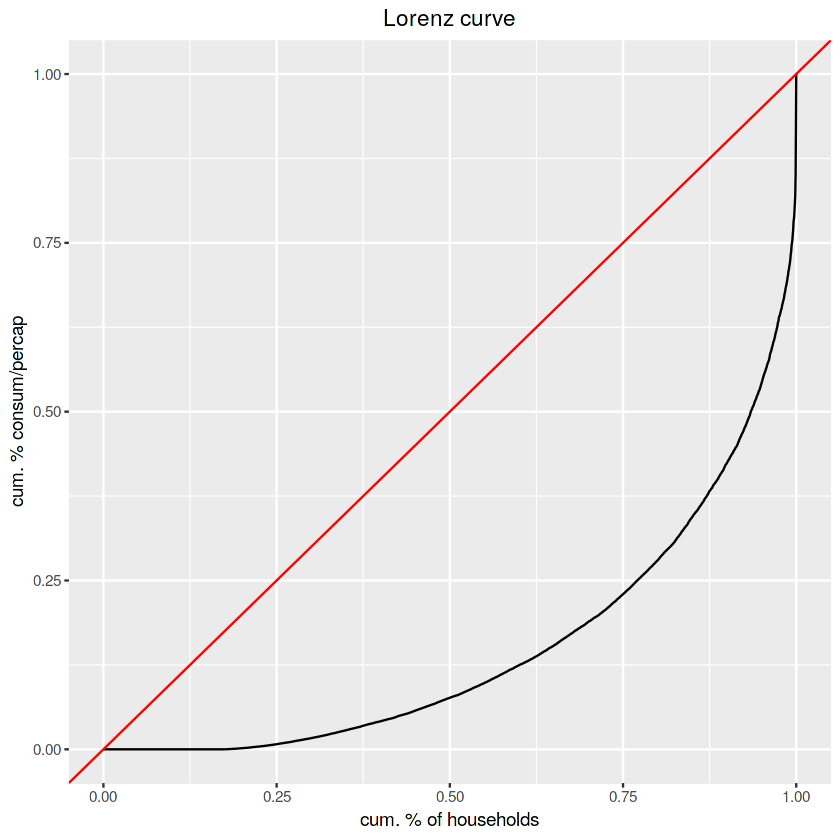

In [62]:
ggplot(data= urban, aes(x=pop_pct, y= consum_pct))+ 
ggtitle("Lorenz curve")+theme(plot.title = element_text(hjust = 0.5))+ 
geom_line()+ 
geom_abline(intercept = 0, slope = 1, color='red')+xlab('cum. % of households')+ylab('cum. % consum/percap')

### 4.2.1.3 Urban: Gini coefficient

In [63]:
cov_consum_V_consum_pct = cov(urban$percap_consum, urban$consum_pct) 
mean_cons = mean(urban$percap_consum)
print((2*cov_consum_V_consum_pct)/(mean_cons))

[1] 0.657053


### 4.2.2.1 Rural: Calculate cumulative sum for population and consumption
Selects estrato 3 (15,000>population>2,500) and estrato 4 (population<2,500) 

In [65]:
rural = consum_residence_df %>% 
arrange(percap_consum) %>%
select(estrato,percap_consum, family_members)%>%
filter(estrato==3 | estrato==4)%>% #select estrato 1&2 MOST IMPORTANT CODE
mutate(consum_cumulative = cumsum(percap_consum), consum_total = sum(percap_consum), pop_total = sum(family_members), pop_cumulative = cumsum(family_members))%>% #Calculate total and cumulative sum for variables 
mutate(consum_pct = (consum_cumulative/consum_total), pop_pct= ((pop_cumulative/ pop_total))) #Calculate quintiles

rural %>%tail(3)

estrato,percap_consum,family_members,consum_cumulative,consum_total,pop_total,pop_cumulative,consum_pct,pop_pct
<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
4,34007.03,3,1173702,1395276,18225,18218,0.8411970,0.9996159
4,54097.42,4,1227799,1395276,18225,18222,0.8799689,0.9998354
3,167476.52,3,1395276,1395276,18225,18225,1.0000000,1.0000000


### 4.2.1.2 Plot Lorenz curve for Urban

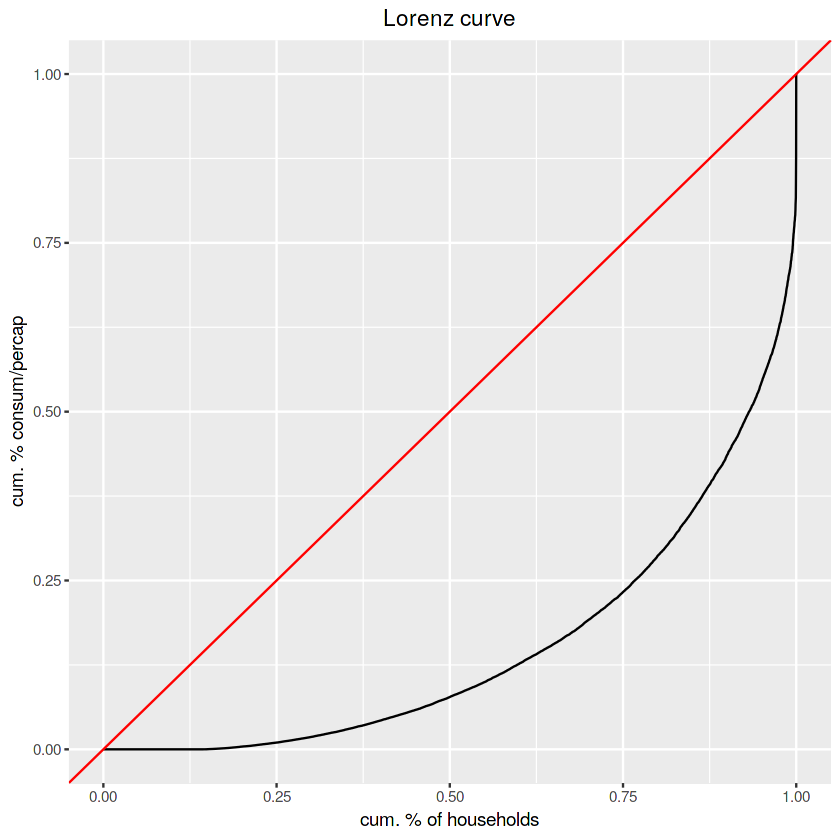

In [66]:
ggplot(data= rural, aes(x=pop_pct, y= consum_pct))+ 
ggtitle("Lorenz curve")+theme(plot.title = element_text(hjust = 0.5))+ 
geom_line()+ 
geom_abline(intercept = 0, slope = 1, color='red')+xlab('cum. % of households')+ylab('cum. % consum/percap')

### 4.2.1.3 Urban: Gini coefficient

In [67]:
cov_consum_V_consum_pct = cov(rural$percap_consum, rural$consum_pct) 
mean_cons = mean(rural$percap_consum)
print((2*cov_consum_V_consum_pct)/(mean_cons))

[1] 0.6595263


## DPLYR examples

## D.1

In [37]:
consum_residence_df %>% group_by(estrato) %>% count(poverty_dummy) 

estrato,poverty_dummy,n
<dbl>,<dbl>,<int>
1,0,1083
1,1,2068
2,0,270
2,1,492
3,0,158
3,1,686
4,0,450
4,1,2843


In [38]:
consum_residence_df %>% group_by(estrato) %>% count(poverty_dummy) %>% filter(poverty_dummy==1)

estrato,poverty_dummy,n
<dbl>,<dbl>,<int>
1,1,2068
2,1,492
3,1,686
4,1,2843
